In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import calendar as cld

import statsmodels.api as sm
plt.style.use('fivethirtyeight')
import statsmodels.api

import nltk
nltk.download(['punkt', 'wordnet','stopwords'])

import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

from langdetect import detect
from wordcloud import WordCloud, STOPWORDS


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package punkt to /Users/Vineeth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Vineeth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Vineeth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Read the listings dataset

In [3]:
listings=pd.read_csv('listings.csv')
listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
print(listings.shape)
print(listings.columns)

(3818, 92)
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'am

### Prices

In [6]:
listings['price'].describe()

count        3818
unique        273
top       $150.00
freq          162
Name: price, dtype: object

I need to remove the $ sign or commas from price and convert them to a number

In [7]:
# This function will do the required steps

def clean_prices(col):
    col=col.apply(lambda x:x.replace('$',''))
    col=col.apply(lambda x:x.replace(',',''))
    col=col.astype(float)
    return col

In [8]:
listings['price']=clean_prices(listings['price'])

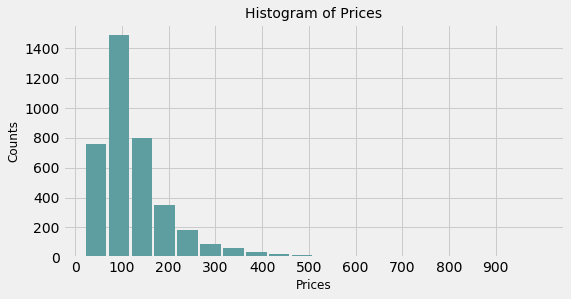

In [206]:
plt.figure(figsize=(8,4))
plt.hist(listings['price'],bins=20,color='cadetblue',alpha=1,rwidth=.9)
plt.xticks(np.arange(0, 1000, step=100))
plt.title('Histogram of Prices',size=14)

plt.xlabel('Prices',size=12)
plt.ylabel('Counts',size=12)
plt.show()


In [10]:
listings['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [11]:
print('Number of listings above 200 are ',sum(listings['price']>200))
print('Number of listings below 50 are ',sum(listings['price']<50))

Number of listings above 200 are  457
Number of listings below 50 are  279


### Listings by neighbourhoods

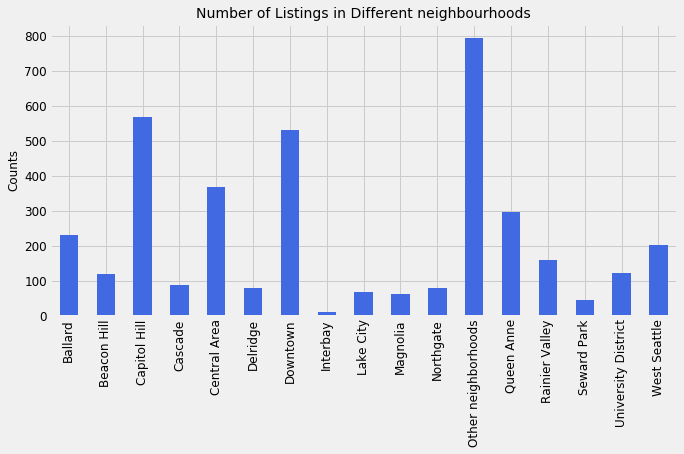

In [205]:
neigh_counts=listings.groupby(['neighbourhood_group_cleansed'])['id'].count()
neigh_counts.head()
neigh_counts.plot(kind='bar',figsize=(10,5),fontsize=12,color='royalblue')
plt.title('Number of Listings in Different neighbourhoods',size=14)
plt.ylabel('Counts',size=12)
plt.xlabel(None)
plt.show()

Capitol Hill, Downtown, and Central Area top the list in terms of the number of listings

How do prices changes from location to location ?

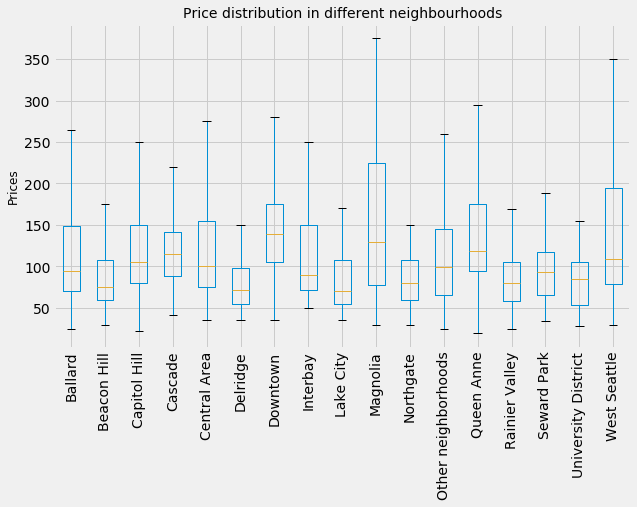

In [209]:
listings.boxplot(column='price',by='neighbourhood_group_cleansed',rot=90,figsize=(10,6),showfliers=False)
plt.title("Price distribution in different neighbourhoods",size=14)
plt.ylabel('Prices',size=12)
plt.xlabel(None)
plt.suptitle(None)
plt.show()

Downtown & Magnolia has the highest median prices. Magnolia has high prices though number of listings there are quite small. After some search , I realised that Magnolia is an affluent part of Seattle. So it makes sense ! At the same time every neighbourhood has sufficient number of budget rooms !

How do I explain the variation in prices among different regions. Do they originate from certain expensive property types in these neighbourhoods ? 

The number of different properties in different regions are below

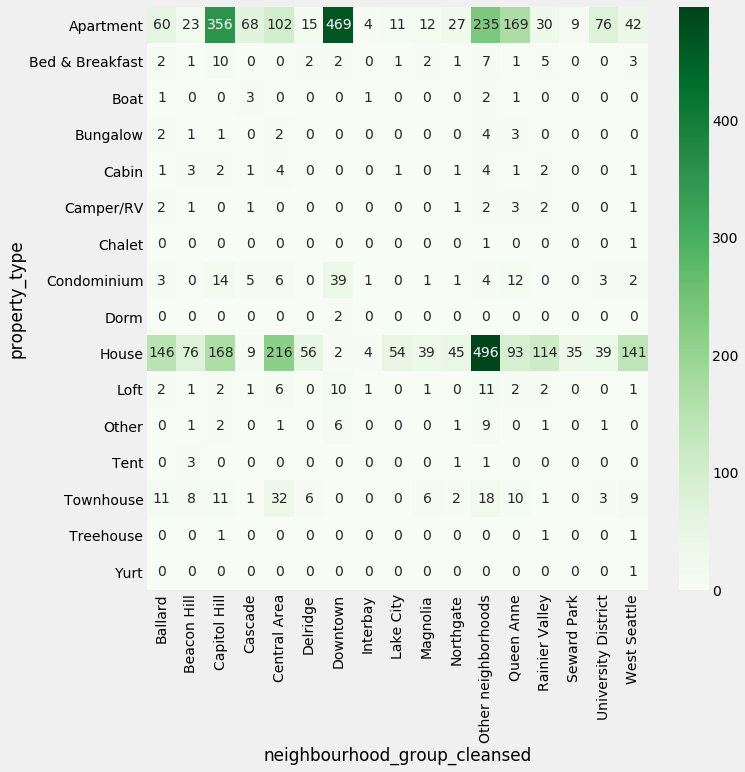

In [210]:
neigh_type_count=pd.crosstab(listings['property_type'],listings['neighbourhood_group_cleansed'])
plt.figure(figsize=(10,10))
sns.heatmap(neigh_type_count,cmap="Greens",annot=True,fmt="d")
plt.show()

Going through the chart, we can see that apartments and Houses dominates the property types. Majority of properties in Downtown are apartments. Capitol Hill and Queen Anne also has more apartments than houses. In contrast, Central Area, West Seattle & Rainier Valley has more houses than apartments. Looking at the some of the higher numbers, one could see that majority of condos are concentrated in downtown but townhouses in the central area.

Below are mean prices for different property types in different neighbourhoods with at least 10 homes

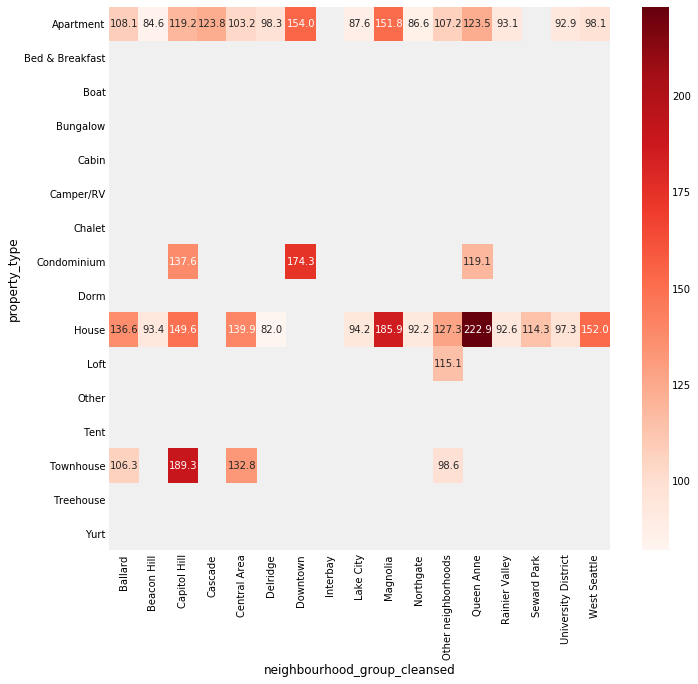

In [16]:
type_neigh_count=listings[['neighbourhood_group_cleansed','property_type','price']].groupby(['property_type','neighbourhood_group_cleansed']).mean().reset_index()
type_neigh_count=type_neigh_count.pivot(index='property_type',columns='neighbourhood_group_cleansed',values='price')

type_neigh_count=type_neigh_count[neigh_type_count>10]

plt.figure(figsize=(10,10))
sns.heatmap(type_neigh_count,cmap="Reds",annot=True,fmt=".1f")
plt.show()

Prices are generally higher in Capitol Hill, Downtown, Magnolia & Queen Anne across different property types. So higher medians we observed in the box plot arises from overall increase in prices across different property types. Interestingly, this chart also tell us where to look if we are interested in certain category.

Let's look at some of the features of listings. I would like to focus on the features with few categories !

In [17]:
# This will create a dataframe with featuers and number of distinct values of that features

val_counts=pd.DataFrame(columns=['variable','count'])
for col in listings.columns:
    count=len(listings[col].value_counts())
    val_counts=val_counts.append({'variable':col,'count':count},ignore_index=True)
val_counts.head()

,variable,count
0,id,3818
1,listing_url,3818
2,scrape_id,1
3,last_scraped,1
4,name,3792


In [18]:
# Select the features with less than 20 categories !
cat_selected=val_counts[(val_counts['count']<20) & (val_counts['count'] >1)  ]

# This function will plot the categories

def plot_cat(cat_col):
    counts=listings[cat_col].value_counts()

    counts.plot(kind='barh',fontsize=15,color='blue')
    plt.tick_params(top=False,right=False)
    plt.title(cat_col)
    plt.show()


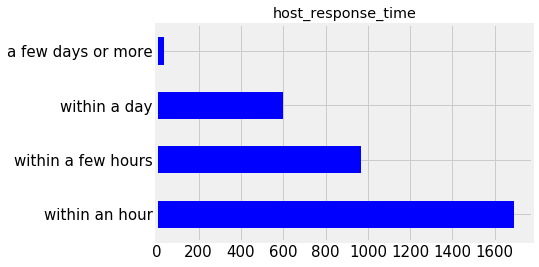

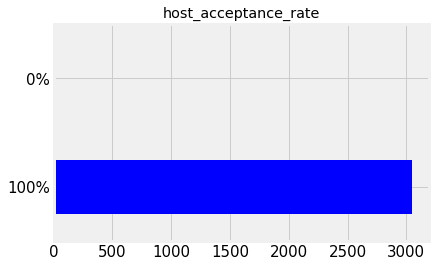

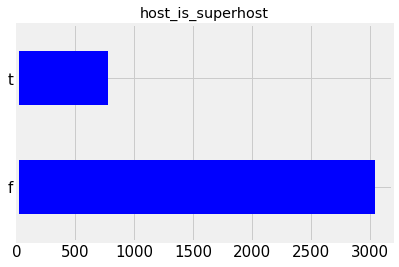

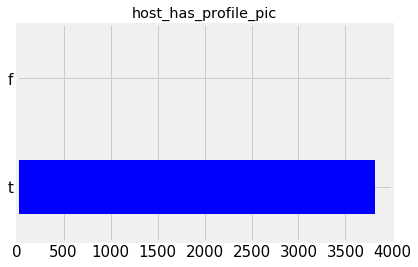

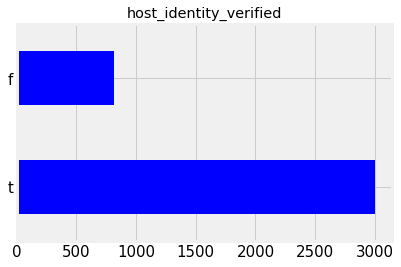

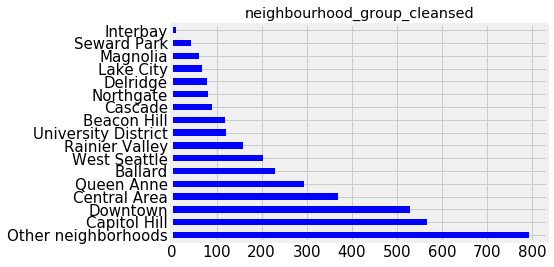

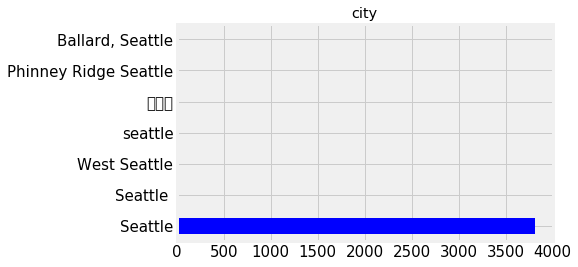

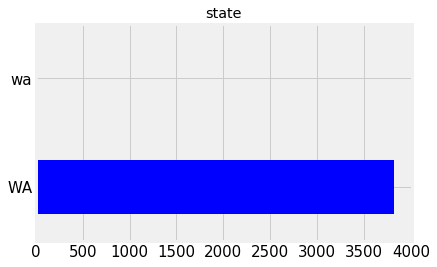

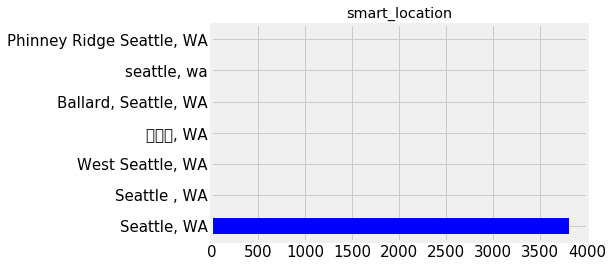

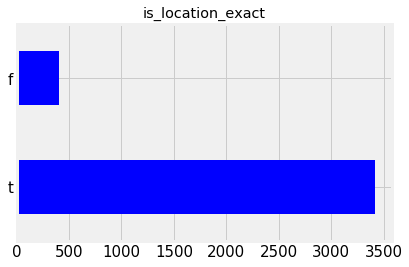

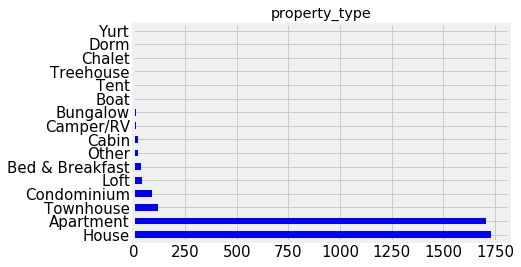

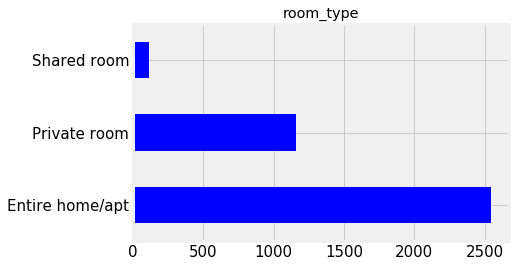

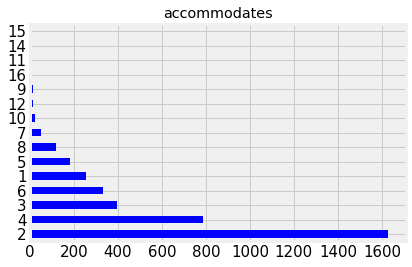

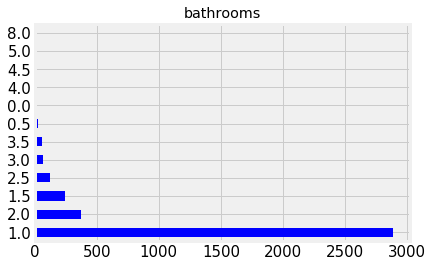

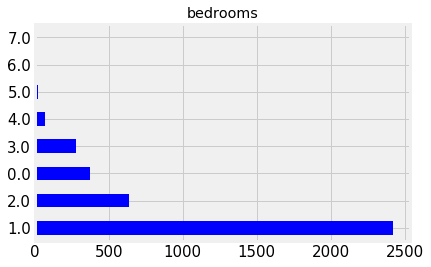

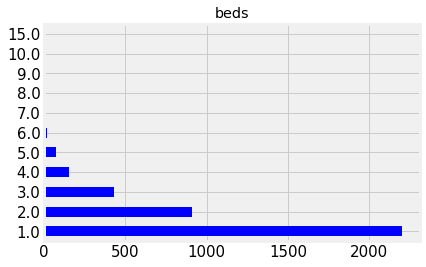

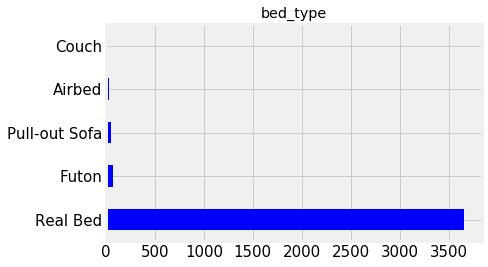

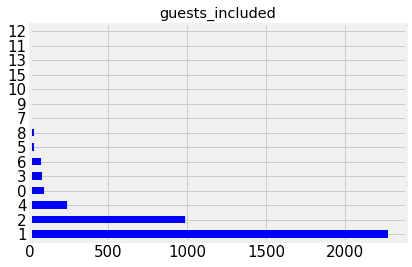

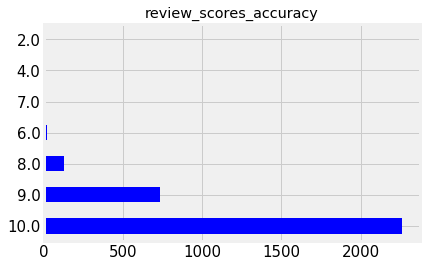

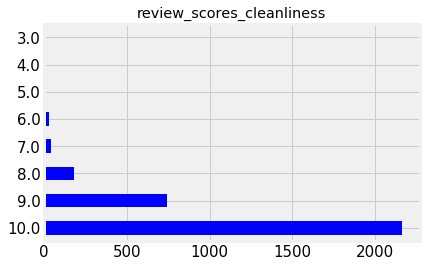

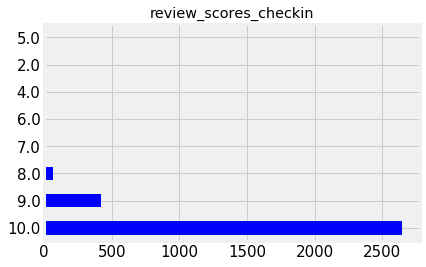

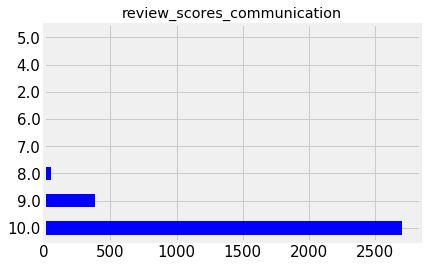

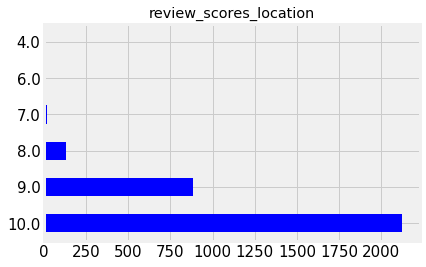

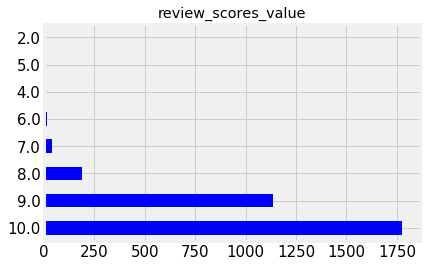

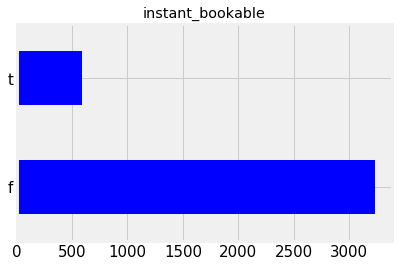

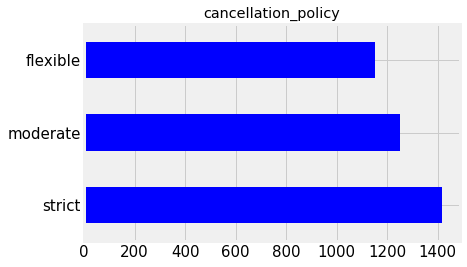

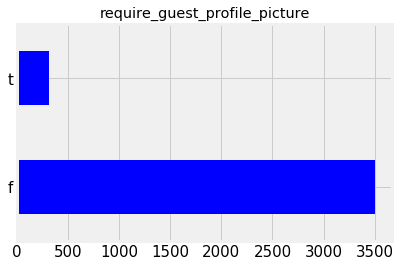

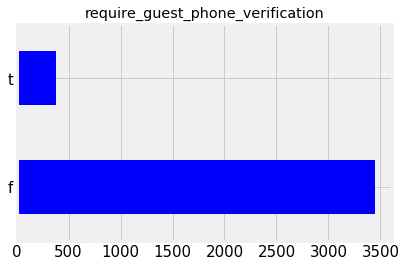

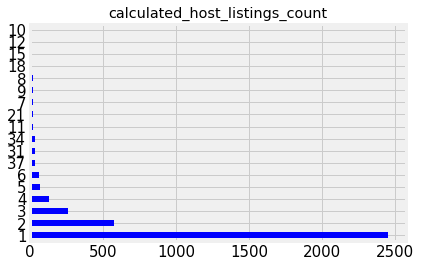

In [19]:
for cat in cat_selected['variable']:
    plot_cat(cat)

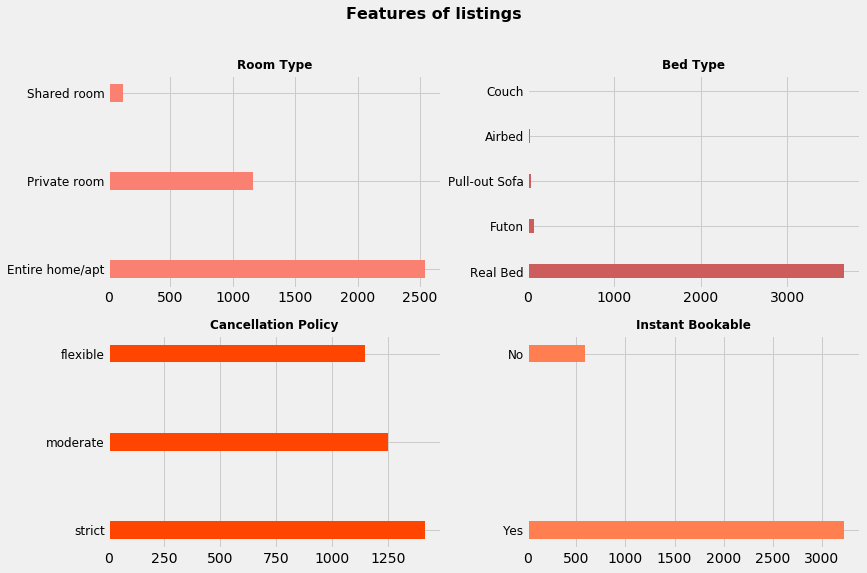

In [222]:
# Create a figure with important features

fig,ax=plt.subplots(2,2,figsize=(12,8))
ax[0,0].tick_params(axis='y', which='major', labelsize=12)
fig.suptitle('Features of listings',fontsize=16, fontweight='bold')
counts=listings['room_type'].value_counts()
ax[0,0].barh(counts.index,counts,height=0.2,color='salmon')
ax[0,1].tick_params(axis='y', which='major', labelsize=12)
ax[0,0].set_title('Room Type',fontweight='heavy',size=12)
counts=listings['bed_type'].value_counts()
ax[0,1].barh(counts.index,counts,height=0.3,color='indianred')
ax[0,1].set_title('Bed Type',fontweight='heavy',size=12)
counts=listings['cancellation_policy'].value_counts()
ax[1,0].barh(counts.index,counts,height=0.2,color='orangered')
ax[1,0].set_title('Cancellation Policy',fontweight='heavy',size=12)
ax[1,0].tick_params(axis='y', which='major', labelsize=12)
counts=listings['instant_bookable'].value_counts()
ax[1,1].barh(counts.index,counts,height=0.1,tick_label=['Yes','No'],color='coral')
ax[1,1].set_title('Instant Bookable',fontweight='heavy',size=12)
ax[1,1].tick_params(axis='y', which='major', labelsize=12)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0,rect=[0, 0, 1, 0.9])
plt.show()

### Build a model to predict the price of listings

In [21]:
# Let's find out the numerical and categorical columns

list_numerical=[]
list_non_numerical=[]
for col in listings.columns:
    try:
        col_mean=listings[col].mean()
#         print(col,"numerical")
        list_numerical.append(col)
    except:
        list_non_numerical.append(col)

In [22]:
print(list_numerical)
print(list_non_numerical)

['id', 'scrape_id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'calculated_host_listings_count', 'reviews_per_month']
['listing_url', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_ne

In [23]:
# Select the important numerical features

numerical_sel= ['host_listings_count', 'host_total_listings_count','accommodates','bathrooms','bedrooms',
 'beds','square_feet','guests_included','minimum_nights', 'maximum_nights','availability_30','availability_60','availability_90','availability_365',
 'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
 'review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count',
 'reviews_per_month']

In [96]:
# Split the data

X_num=listings[numerical_sel].copy()
y=listings['price'].copy()

In [97]:
# Check the null values in each column
X_num.isnull().sum(axis=0)

host_listings_count                  2
host_total_listings_count            2
accommodates                         0
bathrooms                           16
bedrooms                             6
beds                                 1
square_feet                       3721
guests_included                      0
minimum_nights                       0
maximum_nights                       0
availability_30                      0
availability_60                      0
availability_90                      0
availability_365                     0
number_of_reviews                    0
review_scores_rating               647
review_scores_accuracy             658
review_scores_cleanliness          653
review_scores_checkin              658
review_scores_communication        651
review_scores_location             655
review_scores_value                656
calculated_host_listings_count       0
reviews_per_month                  627
dtype: int64

In [98]:
# Square feet column has several null values and let's drop that column
X_num=X_num.drop(['square_feet'],axis=1)

In [99]:
# For simplicity, replace the missing values with minimum value in that column
X_min=X_num.min(axis=0)
print(X_min)

host_listings_count                1.00
host_total_listings_count          1.00
accommodates                       1.00
bathrooms                          0.00
bedrooms                           0.00
beds                               1.00
guests_included                    0.00
minimum_nights                     1.00
maximum_nights                     1.00
availability_30                    0.00
availability_60                    0.00
availability_90                    0.00
availability_365                   0.00
number_of_reviews                  0.00
review_scores_rating              20.00
review_scores_accuracy             2.00
review_scores_cleanliness          3.00
review_scores_checkin              2.00
review_scores_communication        2.00
review_scores_location             4.00
review_scores_value                2.00
calculated_host_listings_count     1.00
reviews_per_month                  0.02
dtype: float64


In [100]:
# Fill with the minimum values
X_num=X_num.fillna(value=X_min,axis=0)
X_num.isnull().sum(axis=0)

host_listings_count               0
host_total_listings_count         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
guests_included                   0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_count    0
reviews_per_month                 0
dtype: int64

In [249]:
# Split into training and test sets after removing the outlier prices

X_num=X_num[y<400]
y=y[y<400]

X_train,X_test,y_train,y_test=train_test_split(X_num,y,test_size=.2,random_state=0)
print(X_train.shape,y_train.shape)

(2992, 23) (2992,)


In [71]:
# Using RFE, select the 10 important features first before building models

estimator=LinearRegression()
selector=RFE(estimator,10,step=1)
selector=selector.fit(X_train,y_train)
numerical_10=X_train.columns[selector.ranking_==1]
print(numerical_10)

Index(['accommodates', 'bathrooms', 'bedrooms', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month'],
      dtype='object')


In [72]:
# Build a model using the these 10 features and build the predictions

model_1=LinearRegression(normalize=True)

model_1.fit(X_train[numerical_10.values],y_train)
y_train_pred=model_1.predict(X_train[numerical_10.values])

# print the statistics on the training set

print('Mean square error are ',mean_squared_error(y_train,y_train_pred))
print('R_squared values is ',r2_score(y_train,y_train_pred))

Mean square error are  2242.2927879880313
R_squared values is  0.49241265443195237


In [73]:
# Make the predictions on the test set
y_test_pred=model_1.predict(X_test[numerical_10.values])
print('Mean square error are ',mean_squared_error(y_test,y_test_pred))
print('R_squared values is ',r2_score(y_test,y_test_pred))

Mean square error are  2170.219038834561
R_squared values is  0.5257659540412627


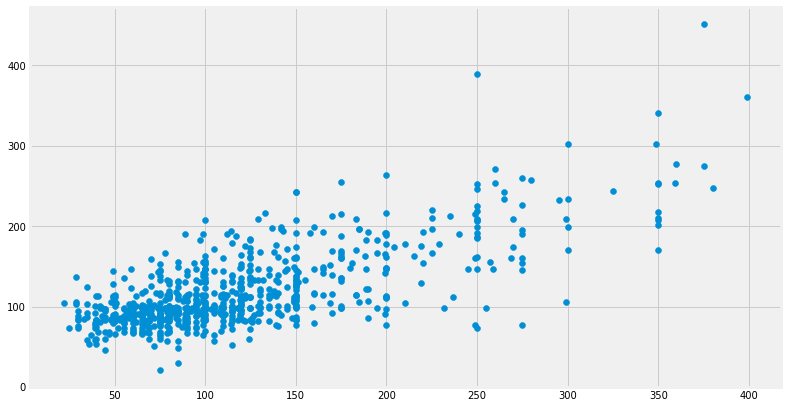

In [74]:
plt.scatter(y_test,y_test_pred)
plt.show()

However,this model doesn't give the significance of features. So I will use the statsmodel to findout pvalues corresponding to each feature

In [75]:
X_train_const=sm.add_constant(X_train[numerical_10.values])
est=sm.OLS(y_train,X_train_const)
est_results=est.fit()
print(est_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     289.2
Date:                Sat, 20 Apr 2019   Prob (F-statistic):               0.00
Time:                        00:05:36   Log-Likelihood:                -15787.
No. Observations:                2992   AIC:                         3.160e+04
Df Residuals:                    2981   BIC:                         3.166e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

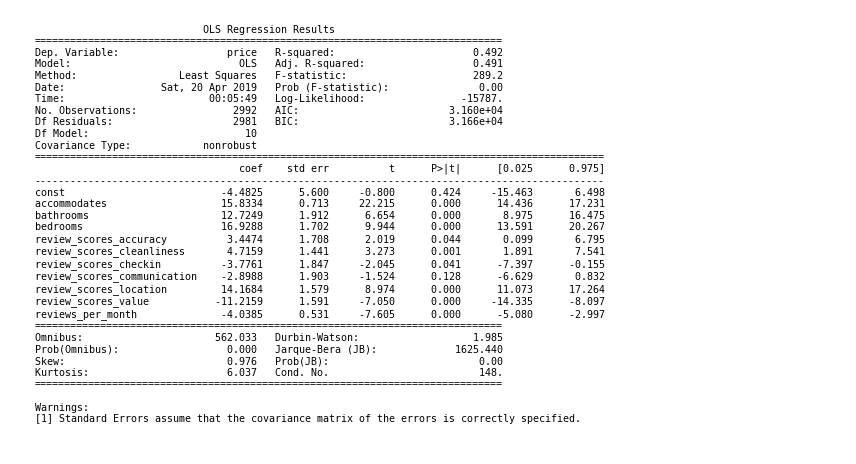

In [76]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(est_results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

**Let's build a separate model with categorical features**

In [44]:
# Select important categorical features

categorical_sel=['host_response_time','host_is_superhost','host_identity_verified','neighbourhood_group_cleansed',
'is_location_exact','property_type','room_type','bed_type','instant_bookable','cancellation_policy',
'require_guest_profile_picture','require_guest_phone_verification']

In [80]:
X_cat=listings[categorical_sel]
y=listings['price']
X_cat.isnull().sum(axis=0)

host_response_time                  523
host_is_superhost                     2
host_identity_verified                2
neighbourhood_group_cleansed          0
is_location_exact                     0
property_type                         1
room_type                             0
bed_type                              0
instant_bookable                      0
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
dtype: int64

In [81]:
# Drop the host_response_time
X_cat=X_cat.drop(['host_response_time'],axis=1)

In [82]:
# Convert the features to dummy variables
X_cat_dum=pd.get_dummies(X_cat)
print(X_cat_dum.shape)

(3818, 56)


In [83]:
# Split into training and test & Build a model

X_cat_dum=X_cat_dum[y<400]
y=y[y<400]


X_train,X_test,y_train,y_test=train_test_split(X_cat_dum,y,test_size=.2,random_state=0)

estimator=LinearRegression()
selector=RFE(estimator,20,step=1)
selector=selector.fit(X_train,y_train)
cat_20=X_train.columns[selector.ranking_==1]
print(cat_20)

Index(['host_is_superhost_f', 'host_is_superhost_t',
       'host_identity_verified_f', 'host_identity_verified_t',
       'neighbourhood_group_cleansed_Ballard',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Central Area',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Other neighborhoods',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_West Seattle',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room', 'cancellation_policy_flexible',
       'cancellation_policy_moderate', 'cancellation_policy_strict'],
      dtype='object')


In [84]:
model_cat=LinearRegression()
model_cat.fit(X_train[cat_20],y_train)
y_train_pred=model_cat.predict(X_train[cat_20])
print(mean_squared_error(y_train,y_train_pred))
print(r2_score(y_train,y_train_pred))

3051.1851604278077
0.3093038586598553


In [85]:
y_test_pred=model_cat.predict(X_test[cat_20])
print(mean_squared_error(y_test,y_test_pred))
print(r2_score(y_test,y_test_pred))

3177.2012683578105
0.30572122658748024


In [87]:
X_train_const=sm.add_constant(X_train[cat_20])
est=sm.OLS(y_train,X_train_const)
est_results=est.fit()
print(est_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     78.70
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          9.20e-225
Time:                        00:09:11   Log-Likelihood:                -16246.
No. Observations:                2992   AIC:                         3.253e+04
Df Residuals:                    2974   BIC:                         3.264e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

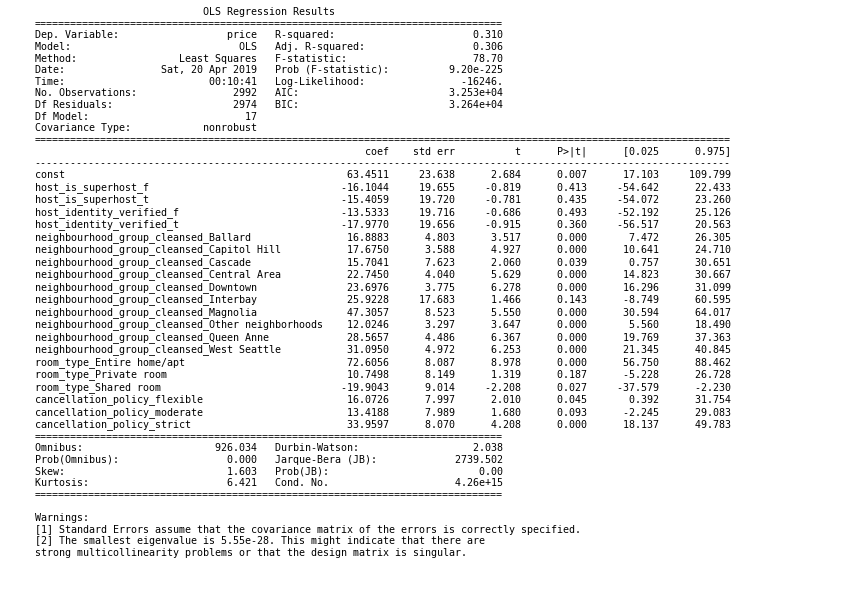

In [88]:
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(est_results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

## Build a model by combining numerical and categorical features

In [104]:
print(X_num.shape)
print(X_cat_dum.shape)
print(y.shape)

(3741, 23)
(3741, 56)
(3741,)


In [105]:
X_all=pd.concat([X_num,X_cat_dum],axis=1)
X_all.shape

In [113]:
X_all_selected=X_all[numerical_10.values.tolist()+cat_20.values.tolist()]
X_all_selected.shape

(3741, 30)

In [127]:
X_train,X_test,y_train,y_test=train_test_split(X_all_selected,y,test_size=.2,random_state=0)
model_final=LinearRegression()
model_final.fit(X_train,y_train)
y_train_pred=model_final.predict(X_train)

print('Mean squared error on the training set is :',mean_squared_error(y_train,y_train_pred))
print('Rsquared value on the training set is :',r2_score(y_train,y_train_pred))

y_test_pred=model_final.predict(X_test)
print('\nMean squared error on the test set is :',mean_squared_error(y_test,y_test_pred))
print('Rsquared value on the test set is :',r2_score(y_test,y_test_pred))


Mean squared error on the training set is : 1738.281090319223
Rsquared value on the training set is : 0.6065056761485799

Mean squared error on the test set is : 1736.9242843496581
Rsquared value on the test set is : 0.620449080875511


**Final model is not bad. Mean squared error is quite low compared to previous cases. It also do well on the test data**

#################

## Read the calandar dataset

**In this section, I'm interested in finding out few things

1. How does the average price and availability changes throughout the year
2. Do they change based on the days  of the week
3. Does availabilities are different for different listings
4. Do the host changes the prices frequently ?

In [128]:
calendar=pd.read_csv("calendar.csv")
print(calendar.shape)
calendar.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


Change the format of the dates & Clean the price columns

In [129]:
calendar['date']=pd.to_datetime(calendar['date'])
calendar['year']=calendar['date'].apply(lambda x: x.year)
calendar['month']=calendar['date'].apply(lambda x: x.month)
calendar['day']=calendar['date'].apply(lambda x: x.strftime("%A"))
calendar.drop(['date'],axis=1,inplace=True)

In [131]:
calendar['price']=calendar['price'].str.replace('$','')
calendar['price']=calendar['price'].str.replace(',','')
calendar['price']=calendar['price'].astype(float)

In [132]:
calendar.head()

,listing_id,available,price,year,month,day
0,241032,t,85.0,2016,1,Monday
1,241032,t,85.0,2016,1,Tuesday
2,241032,f,NaN,2016,1,Wednesday
3,241032,f,NaN,2016,1,Thursday
4,241032,f,NaN,2016,1,Friday


Total availability per month for each day of the week

In [136]:
day_avail=calendar[(calendar['available']=='t')].groupby(['month','day']).count().reset_index()
day_avail=day_avail.pivot(index='day',columns='month',values='available')
day_avail=day_avail.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
day_avail.columns=cld.month_name[1:13]
day_avail

,January,February,March,April,May,June,July,August,September,October,November,December
day,,,,,,,,,,,,
Monday,11172,12741,10859,10130,12925,10328,9571,12308,10303,13308,10924,11231
Tuesday,8611,10155,13518,10144,12914,10357,9596,12310,10316,10625,13625,11236
Wednesday,8543,10154,13532,10120,10320,12920,9604,12346,10325,10630,13636,11245
Thursday,8367,10035,13521,10083,10277,12874,9598,9814,12860,10637,10879,14023
Friday,8262,10037,10808,12900,10308,10237,11940,9841,12880,10655,10896,14039
Saturday,8315,10009,10805,12573,10320,10237,11936,9859,10272,13282,10902,14064
Sunday,11667,10190,10895,10087,12907,10291,11977,9869,10290,13301,10918,11223


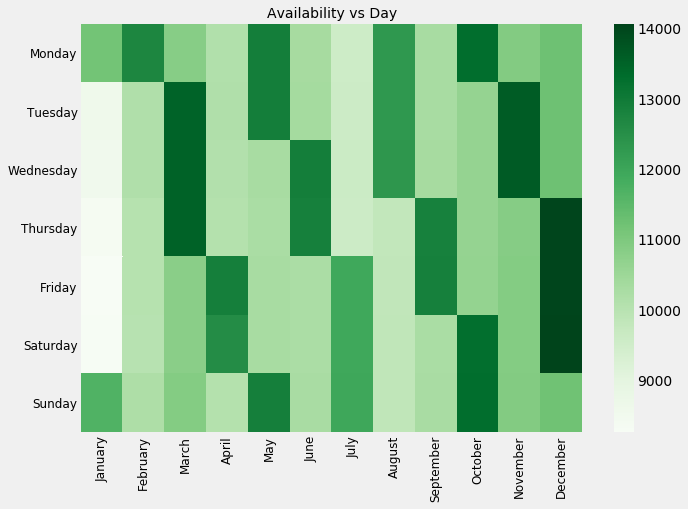

In [230]:
plt.figure(figsize=(10,7))
sns.heatmap(day_avail,cmap="Greens")
plt.ylabel(None)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Availability vs Day',size=14)
plt.show()

Availability is quite unpredictable. Colour of each block is proportional the number of available rooms on a particular day of month. Surprisingly, pattern changes for each month. Depending on the month, number of listings on a day alternates between high and low values. This is true for any day of the week !

Let's calculate the same behaviour for prices !

In [138]:
day_price=calendar[(calendar['available']=='t')][['month','day','price']].groupby(['month','day']).mean().reset_index()
day_price=day_price.pivot(index='day',columns='month',values='price')
day_price=day_price.loc[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
day_price.columns=cld.month_name[1:13]
day_price

,January,February,March,April,May,June,July,August,September,October,November,December
day,,,,,,,,,,,,
Monday,123.981024,122.097559,126.452896,132.218263,137.892766,145.857765,150.344060,149.002031,140.527904,134.571160,133.539637,134.672870
Tuesday,119.030310,121.458296,125.819870,132.080737,137.246090,146.016511,150.054085,149.001706,140.186894,134.746635,133.446679,134.439035
Wednesday,119.016622,121.419539,125.846881,132.187055,136.092345,145.297214,149.855998,149.105216,140.148862,134.751176,133.595483,134.467052
Thursday,119.172822,122.119183,127.325790,133.306655,137.705167,146.423101,150.346531,149.844610,142.406376,135.830591,134.703649,135.719318
Friday,126.563665,129.506327,134.623057,139.457984,145.743791,151.847025,156.080988,154.892694,148.142624,142.017738,140.817640,142.160766
Saturday,126.828623,130.014387,134.723646,140.647021,145.808430,151.958582,156.019856,154.982250,148.787091,142.396928,140.821317,142.170435
Sunday,124.910860,124.118940,127.484993,133.235452,137.724413,145.792829,150.435585,148.987131,141.605539,134.751748,133.989284,135.049452


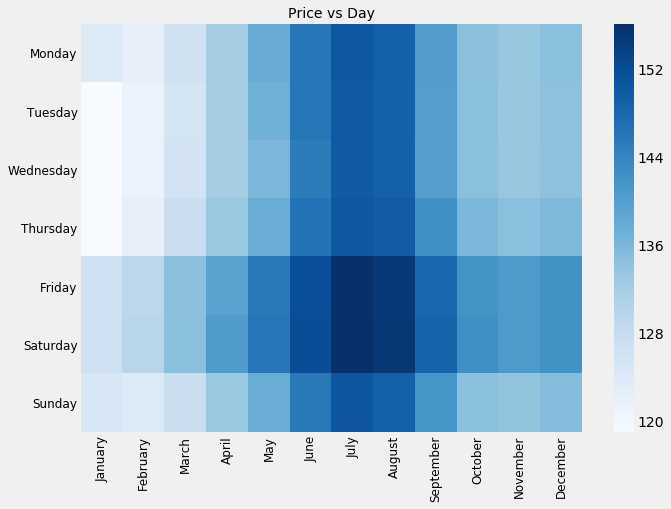

In [231]:
plt.figure(figsize=(10,7))
sns.heatmap(day_price,cmap="Blues")

plt.ylabel(None)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Price vs Day',size=14)
plt.show()
plt.show()

This is beautiful. We can nice patterns. Price changes are generally negligible across the day of the week with highest value occurring on Friday and Saturday. June, July and August have the high prices

Let's plot the average prices and total availability on a monthly basis

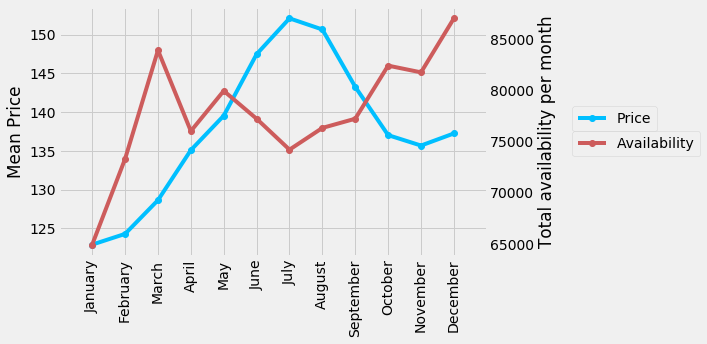

In [229]:
monthly_avail=calendar[calendar['available']=='t'][['available','month']].groupby('month').count()
price_monthly=calendar[calendar['available']=='t'][['price','month']].groupby('month').mean()

fig, ax1 = plt.subplots(figsize=(10,5))


ax1.plot(price_monthly.index, price_monthly,'-o',c='deepskyblue',label='Price')
ax1.set_xticks(np.arange(13))
ax1.set_xticklabels(cld.month_name[0:13],rotation=90)
ax1.set_xlim(0,13)
ax1.set_ylabel('Mean Price')
ax1.legend(loc=(1.2,.5))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(monthly_avail.index, monthly_avail,'-o',c='indianred',label="Availability")
ax2.set_xlim(0,13)
ax2.set_ylabel('Total availability per month')
ax2.xaxis.label.set_color('red')
ax2.tick_params(axis='x', colors='red')
ax2.grid(False)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(loc=(1.2,.40))
plt.show()

What is driving these changes in availability ?

There are two possibilities. Either all hosts make their listings available or unavailable simultanousely. Or few listings are available consistently but others are not !



In [141]:
# Calculate the availabilty of each listing in each month

listing_monthly_avail=pd.crosstab(calendar['listing_id'][calendar['available']=='t'],calendar['month'][calendar['available']=='t'])
listing_monthly_avail.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
listing_id,,,,,,,,,,,,
3335,2,1,31,30,31,30,31,31,30,31,30,31
4291,30,29,31,30,31,30,31,31,30,31,30,31
5682,11,23,11,25,25,30,31,31,30,31,30,31
6606,30,29,31,30,31,30,31,31,30,31,30,31
7369,3,18,31,1,0,0,0,0,0,0,0,0


In [142]:
# Calculate the number of months where a listing available for more than 15 days

listing_monthly_avail['15count']=(listing_monthly_avail>15).sum(axis=1)
listing_monthly_avail['15count'].head()

listing_id
3335    10
4291    12
5682    10
6606    12
7369     2
Name: 15count, dtype: int64

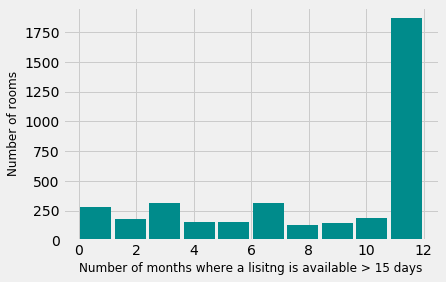

In [233]:
plt.hist(listing_monthly_avail['15count'],rwidth=.9,color='darkcyan')
plt.xlabel("Number of months where a lisitng is available > 15 days",size=12)
plt.ylabel("Number of rooms",size=12)
plt.show()

Only half of the listings are available every month at least for 15 days ! A good number of them are available only a small number of month

In [145]:
# Calculate mean price of listing for each month & Calculate the range of prices for listings

listing_monthly_price=(calendar[calendar['available']=='t'][['listing_id','price','month']].groupby(['listing_id','month']).mean()).reset_index()


listing_monthly_price=listing_monthly_price.pivot(index='listing_id',columns='month',values='price')
listing_monthly_price['mean']=listing_monthly_price.iloc[:,0:12].mean(axis=1)
listing_monthly_price['range']=listing_monthly_price.iloc[:,0:12].max(axis=1)-listing_monthly_price.iloc[:,0:12].min(axis=1)
listing_monthly_price.head()

month,1,2,3,4,5,6,7,8,9,10,11,12,mean,range
listing_id,,,,,,,,,,,,,,
3335,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,0.000000
4291,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,0.000000
5682,49.636364,52.826087,53.000000,53.000000,56.640000,60.000000,60.000000,60.000000,53.133333,48.580645,48.533333,48.645161,53.666244,11.466667
6606,92.666667,92.758621,92.580645,93.333333,92.580645,92.666667,93.225806,92.580645,93.000000,92.903226,92.666667,93.225806,92.849061,0.752688
7369,85.000000,85.000000,85.000000,85.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.000000,0.000000


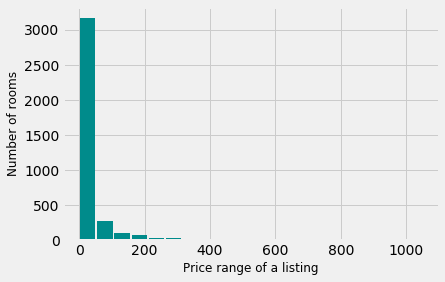

In [238]:
plt.hist(listing_monthly_price['range'],bins=20,rwidth=.9,color='darkcyan')
plt.xlabel('Price range of a listing',size=12)
plt.ylabel("Number of rooms",size=12)
plt.show()

In [148]:
listing_monthly_price['range'].describe()

count    3723.000000
mean       27.349369
std        61.003106
min         0.000000
25%         0.000000
50%         1.666667
75%        25.000000
max      1050.000000
Name: range, dtype: float64

In [250]:
sum(listing_monthly_price['range']>100)

296

So for most of the listings, price vary little while for others range of prices are large. Median price range is 1.5$ meaning for 50% of the listings prices change only by 1.5$. Number of listings where the price changes by more than 100$ is 296

In [149]:
listing_monthly_price[listing_monthly_price['range']>100].head(10)

month,1,2,3,4,5,6,7,8,9,10,11,12,mean,range
listing_id,,,,,,,,,,,,,,
13068,335.153846,420.965517,467.806452,541.965517,397.909091,399.714286,402.769231,395.870968,401.7,400.354839,397.066667,404.838710,413.842927,206.811671
19619,155.500000,154.727273,178.350000,194.666667,220.615385,260.440000,NaN,NaN,NaN,NaN,NaN,NaN,194.049887,105.712727
19623,178.478261,173.888889,202.935484,231.866667,219.096774,343.533333,NaN,NaN,NaN,NaN,NaN,NaN,224.966568,169.644444
24212,176.666667,193.103448,215.294118,239.565217,273.074074,417.666667,NaN,NaN,NaN,NaN,NaN,NaN,252.561698,241.000000
38545,341.590909,246.517241,327.677419,424.100000,477.225806,545.000000,545.000000,545.000000,545.0,610.000000,610.000000,610.000000,485.592615,363.482759
59827,131.454545,127.310345,167.516129,174.866667,194.967742,219.100000,240.483871,NaN,NaN,NaN,NaN,NaN,179.385614,113.173526
59838,186.875000,176.636364,199.080000,231.866667,219.096774,343.533333,NaN,NaN,NaN,NaN,NaN,NaN,226.181356,166.896970
217142,175.769231,275.434783,275.322581,278.333333,294.483871,378.266667,395.000000,395.000000,296.0,203.387097,200.000000,200.000000,280.583130,219.230769
224763,149.000000,173.888889,172.741935,175.000000,184.225806,274.100000,290.000000,290.000000,180.2,158.580645,157.800000,159.645161,197.098536,141.000000


The plot below shows how the mean prices of these two categories ( price range <100 and >100) changes over the months

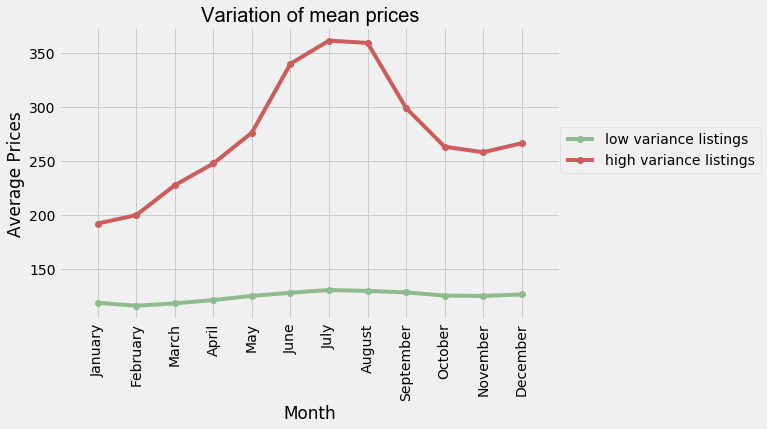

In [239]:
high_range_mean=listing_monthly_price[listing_monthly_price['range']>100].mean(axis=0)
low_range_mean=listing_monthly_price[listing_monthly_price['range']<100].mean(axis=0)

fig,ax=plt.subplots(figsize=(8,5))

ax.plot(low_range_mean.index[0:12],low_range_mean[0:12],'-o',label='low variance listings',color='darkseagreen')
ax.plot(high_range_mean.index[0:12],high_range_mean[0:12],'-o',label='high variance listings',color='indianred')
ax.set_xticks(np.arange(13))
ax.set_xticklabels(cld.month_name[0:13],rotation=90)
ax.set_xlim(0,13)
ax.set_title('Variation of mean prices',loc='center',fontname='arial')
ax.set_xlabel('Month')
ax.set_ylabel('Average Prices')
ax.legend(loc=(1,.5),ncol=1)
plt.show()

############ End of the calendar section ###############

## Read the reviews data set

In [154]:
reviews=pd.read_csv('reviews.csv')
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [155]:
print('Totoal number of reviews are :',reviews.shape[0])
print('Total number of listings are :',len(reviews['listing_id'].unique()))
print('Total number of reviewers are :',len(reviews['reviewer_id'].unique()))

Totoal number of reviews are : 84849
Total number of listings are : 3191
Total number of reviewers are : 75730


Let's calculate some descriptive statistics. From the previous numbers, we can expect an average reviewer writing only a small number of reviews !

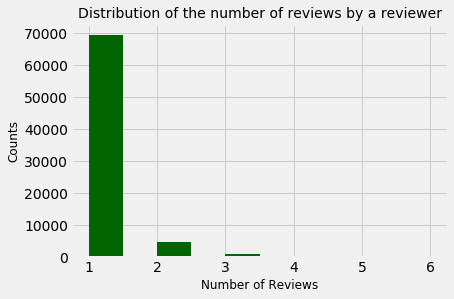

In [240]:
plt.figure(figsize=(6,4))
plt.hist(reviews['reviewer_id'].value_counts(),range=(1,6),color='darkgreen')
plt.title('Distribution of the number of reviews by a reviewer',size=14)
plt.xlabel('Number of Reviews',size=12)
plt.ylabel('Counts',size=12)
plt.show()

In [157]:
print(sum(reviews['reviewer_id'].value_counts()==1))
print(sum(reviews['reviewer_id'].value_counts()>1))
print(sum(reviews['reviewer_id'].value_counts()>10))

69381
6349
26


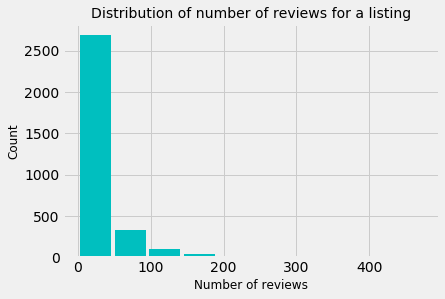

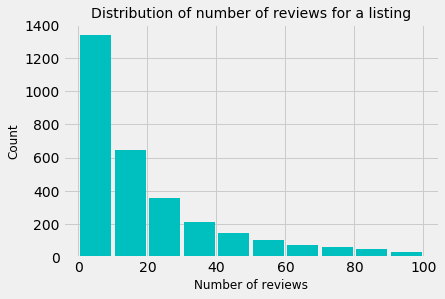

In [251]:
# Let's look at the number of reviews received by a listing

plt.hist(reviews['listing_id'].value_counts(),color='c',rwidth=.9)
plt.xlabel('Number of reviews',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of number of reviews for a listing',size=14)
plt.show()

plt.hist(reviews['listing_id'].value_counts(),range=(0,100),color='c',rwidth=.9)
plt.xlabel('Number of reviews',size=12)
plt.ylabel('Count',size=12)
plt.title('Distribution of number of reviews for a listing',size=14)
plt.show()

Let's find out whether any of the listings got disproportionate number of review from the same reviewer ! 

In [159]:
# Does any reviwers has given more than one review to a listing
listing_reviewer_df=pd.crosstab(reviews['listing_id'],reviews['reviewer_id'])

In [160]:
# Count the instance where more than one review

(listing_reviewer_df>1).sum().sum()

1087

In [168]:
review_counts=listing_reviewer_df.values.flatten().tolist()

In [169]:
# How many reviews were involved ?
review_count_filtered=[s for s in review_counts if s!=0 and s!=1]

In [170]:
print(len(review_count_filtered))
print(sum(review_count_filtered))

1087
2400


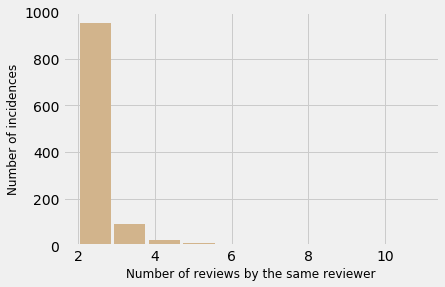

In [246]:
plt.hist(review_count_filtered,color='tan',rwidth=.9)
plt.xlabel('Number of reviews by the same reviewer',size=12)
plt.ylabel('Number of incidences',size=12)
plt.show()

Instances were a reviewer has given more than two reviews to the same listing is quite small. So I believe these reviews are quite fair !

### Comments analysis


In [175]:
# This function counts the number of words in a comment

def count_word(text):
    if not pd.isnull(text):
        tokens=word_tokenize(text)
        return(len(tokens))

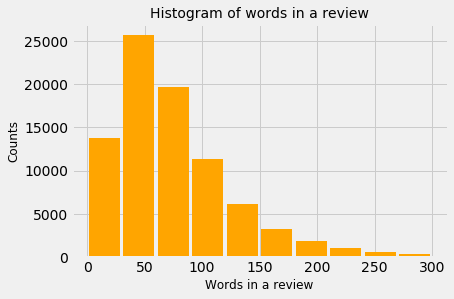

In [248]:
word_count=reviews['comments'].apply(count_word)
plt.hist(word_count.dropna(),range=(0,300),color='orange',rwidth=.9)
plt.title('Histogram of words in a review',size=14)
plt.xlabel('Words in a review',size=12)
plt.ylabel('Counts',size=12)
plt.show()

In [ ]:
# Let's find out the frequency words reviewers used

In [177]:
comments=reviews['comments'].dropna()

def tokenize(text):
    
    text=re.sub(r"[^a-zA-Z]"," ",text)
    text=text.lower()      
    tokens=word_tokenize(text)  
    stop_words=stopwords.words('english')
    
    tokens=[word for word in tokens if word not in stop_words]
    
    lemmatizer= WordNetLemmatizer()
    
    clean_tokens=[]
    
    for tok in tokens:
        clean_tok=lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)
    
    return clean_tokens

clean_words=comments.apply(tokenize)
clean_words_list=[item for sublist in clean_words for item in sublist]

words_freq=pd.Series(clean_words_list).value_counts().sort_values(ascending=False)
words_freq.head()

great      60987
stay       52448
place      50169
seattle    40344
u          32459
dtype: int64

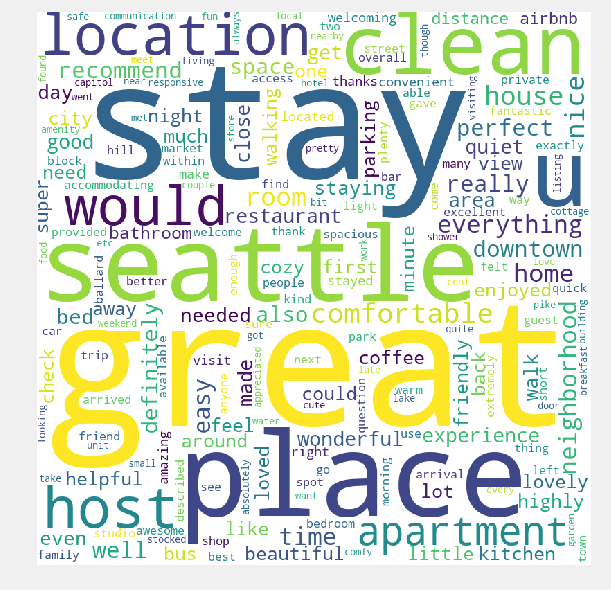

In [178]:
cloud=WordCloud().generate_from_frequencies(dict(words_freq))

stopwords_cloud = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords_cloud, 
                min_font_size = 10).generate_from_frequencies(dict(words_freq)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

# Create a title image

In [179]:
description=listings['summary'].dropna()
descr_words=description.apply(tokenize)
descr_words_list=[item for sublist in descr_words for item in sublist]
descr_freq=pd.Series(descr_words_list).value_counts().sort_values(ascending=False)
descr_freq.head()

seattle     1953
downtown    1504
bedroom     1194
room        1039
home         995
dtype: int64

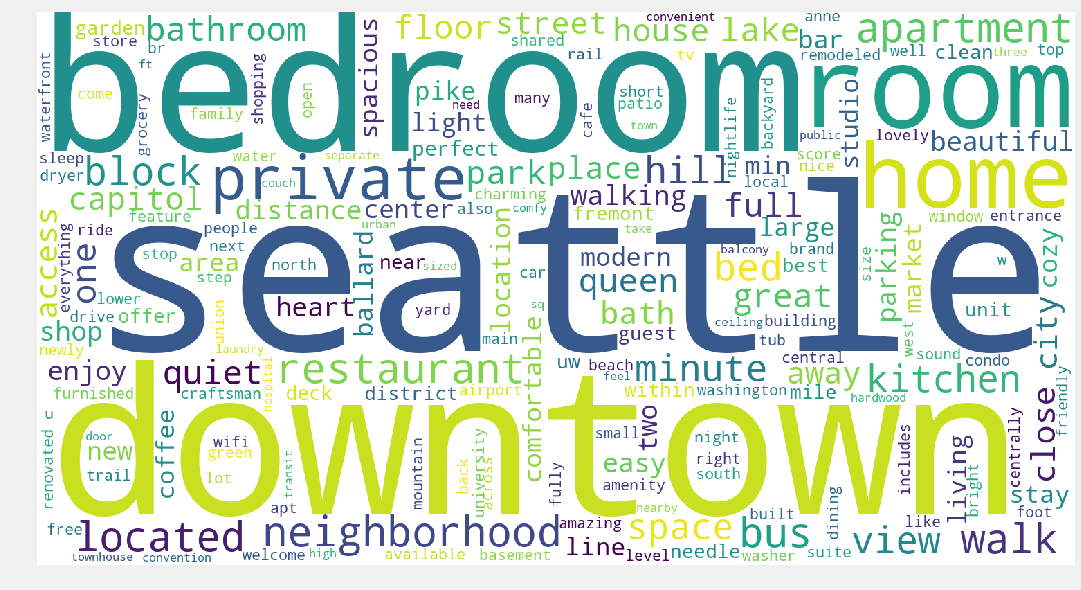

In [180]:
stopwords_cloud = set(STOPWORDS)
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='white', 
                stopwords = stopwords_cloud, 
                min_font_size = 10).generate_from_frequencies(dict(descr_freq)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
